In [252]:
#               min  max   mean     trim mean  median  std     cv
# days_active   0    2263  678.731  609.915    525     564.656 0.83193

# mean      678.730684
# std       564.656219
# min         0.000000
# 25%       195.000000
# 50%       525.000000
# 75%      1045.000000
# max      2263.000000

# Extended Percentiles
# .1   .2    .3    .4    .5           .6           .75          .8           .9
# 80.0 153.0 246.0 374.0 5.250000e+02 7.178000e+02 1.045000e+03 1.173200e+03 1.513600e+03

In [253]:
# Imports

%load_ext autoreload
%autoreload 2

%matplotlib inline

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../lib')
import utils
import preprocessing

def log_plot(columns):
    plt.figure(figsize=(20,15))

    for column in columns:
        plt.plot(np.sort(np.log(df_raw[column])), label=column)

    plt.legend(loc='lower right')
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [254]:
# Load in data

PATH = "../data/"
df_raw = pd.read_csv(f'{PATH}churn.csv', low_memory=False, 
                     parse_dates=['canceldate', 'licence_registration_date', 'golive_date'])

In [257]:
df_processed = preprocessing.prepare_data(df_raw)

COLUMN_NAME = 'cases_age_hours_total_log'

In [258]:
df_processed[COLUMN_NAME].describe()

count    5761.000000
mean        6.971147
std         1.235274
min         0.000000
25%         7.093405
50%         7.093405
75%         7.144407
max        10.574057
Name: cases_age_hours_total_log, dtype: float64

In [263]:
df_processed[df_processed[COLUMN_NAME].isna() == True]

,username,merchant,team,vertical,salesperson,cases_total,cases_open,cases_closed,cases_age_hours_average,interactions_total,...,golive_Is_month_start,golive_Is_quarter_end,golive_Is_quarter_start,golive_Is_year_end,golive_Is_year_start,golive_Elapsed,days_active_log,golive_days_log,cases_age_hours_total_log,annual_revenue_log
23,N002543,Prestige LED Lighting,not specified,Tools & Hardware,not specified,1,0,0,0,2.0,...,True,False,True,False,True,0,7.683864,NaN,NaN,NaN
200,N001622,Edible Blooms NZ,Neto XL,Gifting,not specified,1,0,0,249,0.0,...,True,False,True,False,True,0,7.650169,NaN,NaN,11.841813
233,N001941,Topstar Computer International,not specified,Electronics & HiFi,alison.jordan,1,0,0,249,2.0,...,True,False,True,False,True,0,7.663877,NaN,NaN,7.319891
230,N001826,iCam Security Services,not specified,Electronics & HiFi,rene,1,0,0,249,1.0,...,True,False,True,False,True,0,7.663877,NaN,NaN,13.099272
352,L003298,Noahs Shed,not specified,Homewares,not specified,1,0,0,249,2.0,...,True,False,True,False,True,0,7.605890,NaN,NaN,12.180921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,N062111,Gainey Lawn Bowls & Sporting Goods,Team Aspire,Sports & Recreation,richard,1,0,0,249,0.0,...,True,False,True,False,True,0,5.313206,NaN,NaN,10.817373
5653,N061402,zoomautoparts,Team Vision,Motor Parts & Automo,simon.white,1,0,0,249,3.0,...,True,False,True,False,True,0,5.141664,NaN,NaN,NaN
5666,N062334,Unique Party Shop,Team Vision,Other,richard,1,0,0,249,1.0,...,True,False,True,False,True,0,5.123964,NaN,NaN,8.400978
5704,N062141,MaverickCampers,not specified,Other,dominic,1,0,0,249,3.0,...,False,False,False,False,False,1549497600,4.948760,4.49981,NaN,NaN


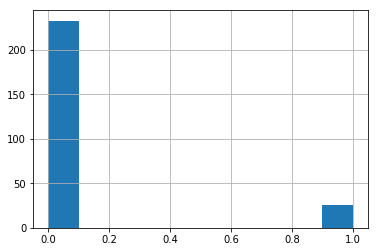

In [244]:
df_processed[COLUMN_NAME].hist()

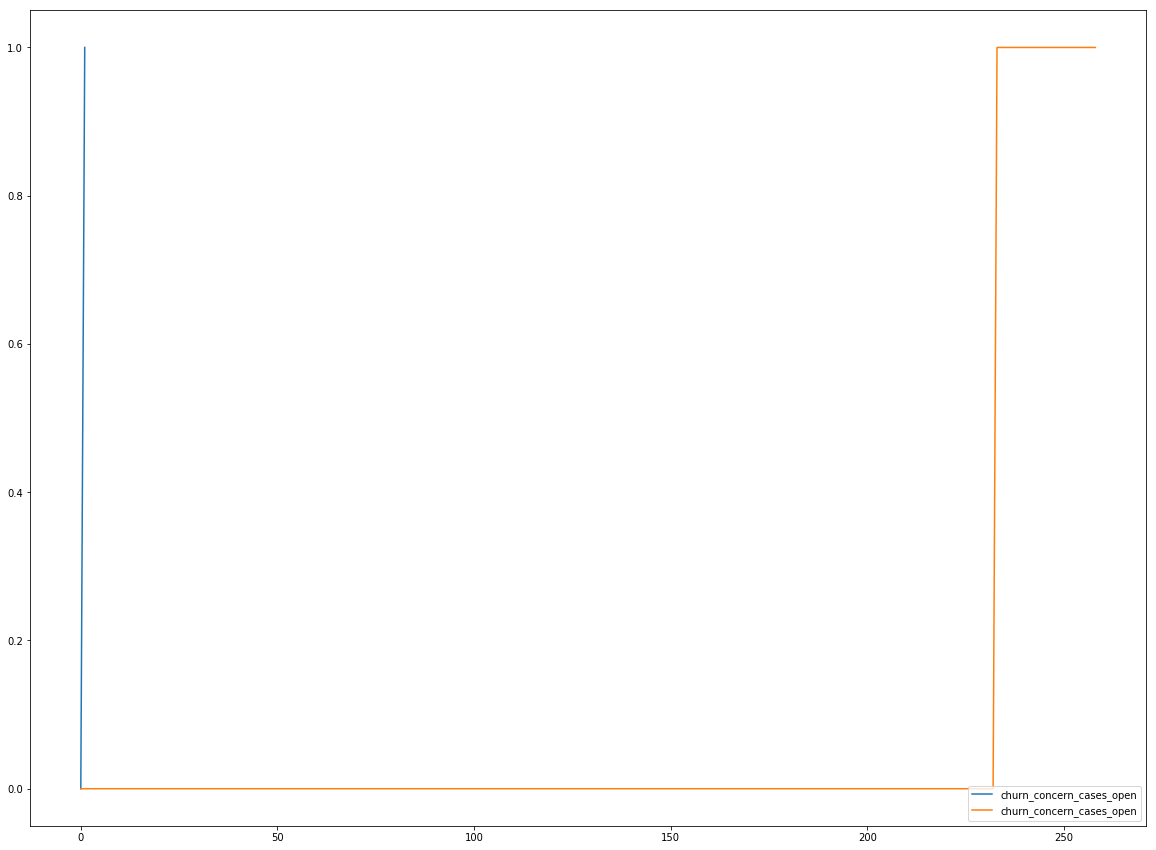

In [245]:
# Plot sorted unique and non unique values for COLUMN_NAME

plt.figure(figsize=(20,15))

plt.plot(np.unique(np.sort(df_processed[COLUMN_NAME])), label=COLUMN_NAME)
plt.plot(np.sort(df_processed[COLUMN_NAME]), label=COLUMN_NAME)

plt.legend(loc='lower right')
plt.show()

In [226]:
df_processed = preprocessing.logify_feature(df_processed, COLUMN_NAME)

df_processed[COLUMN_NAME+"_log"].describe()

count    4458.000000
mean        9.769856
std         3.474291
min        -0.094311
25%         9.018358
50%        10.872195
75%        11.936929
max        17.742592
Name: annual_revenue_log, dtype: float64

//anaconda2/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
//anaconda2/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


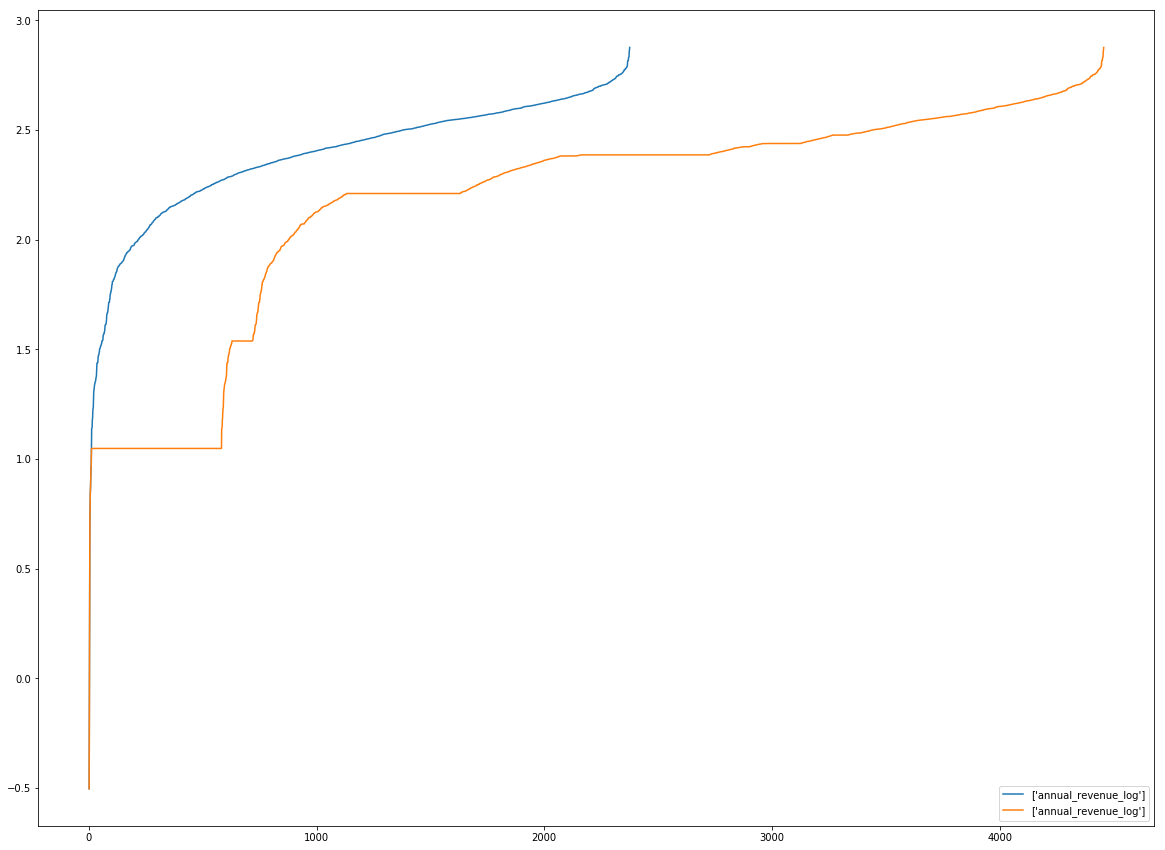

In [228]:
# Plot sorted unique and non unique log values for COLUMN_NAME

plt.figure(figsize=(20,15))

plt.plot(np.log(np.unique(np.sort(df_processed[COLUMN_NAME+"_log"]))), label=[COLUMN_NAME+"_log"])
plt.plot(np.log(np.sort(df_processed[COLUMN_NAME+"_log"])), label=[COLUMN_NAME+"_log"])

plt.legend(loc='lower right')
plt.show()

In [229]:
df_processed[COLUMN_NAME+"_log"].describe()

count    4458.000000
mean        9.769856
std         3.474291
min        -0.094311
25%         9.018358
50%        10.872195
75%        11.936929
max        17.742592
Name: annual_revenue_log, dtype: float64